Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

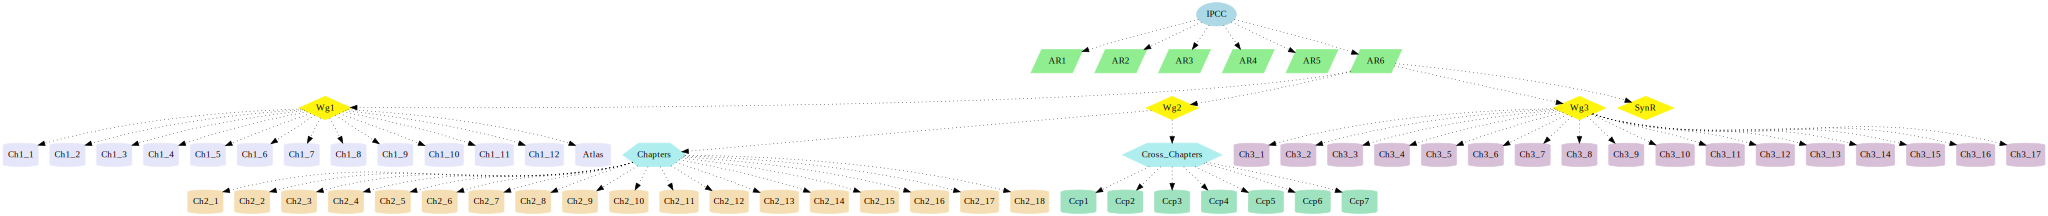

In [ ]:
# Colab Cell 1: install Graphviz + scraping libs + system binary
!apt-get update -y && apt-get install -y graphviz
!pip install graphviz requests beautifulsoup4

# Colab Cell 2: build the graph with ToC‐driven section links
import requests
from bs4 import BeautifulSoup
import graphviz
from IPython.display import SVG, display

graph = graphviz.Digraph(format='svg')

# 1) Root
graph.node('IPCC', shape='oval', style='filled', color='#ADD8E6',
           URL='https://www.ipcc.ch/report')

# 2) AR1–AR6
for i in range(1, 7):
    ar = f'AR{i}'
    graph.node(ar, shape='parallelogram', style='filled', color='#90EE90')
    graph.edge('IPCC', ar, style='dotted')

# 3) Wg1–3 + SynR under AR6
for node in ['Wg1', 'Wg2', 'Wg3', 'SynR']:
    url = (f"https://www.ipcc.ch/report/ar6/{node.lower()}/"
           if node != 'SynR'
           else "https://www.ipcc.ch/report/ar6/syr/")
    graph.node(node, shape='diamond', style='filled', color='#FFF4EO', URL=url)
    graph.edge('AR6', node, style='dotted')

# 4) WG1 chapters + Atlas
for i in range(1, 13):
    n = f'Ch1_{i}'
    url = f"https://www.ipcc.ch/report/ar6/wg1/chapter/chapter-{i}/"
    graph.node(n, shape='cylinder', style='filled', color='#E6E6FA', URL=url)
    graph.edge('Wg1', n, style='dotted')
graph.node('Atlas', shape='cylinder', style='filled', color='#E6E6FA',
           URL="https://www.ipcc.ch/report/ar6/wg1/chapter/atlas/")
graph.edge('Wg1', 'Atlas', style='dotted')

# 5) WG2 subcategories
for sub in ['Chapters', 'Cross_Chapters']:
    graph.node(sub, shape='hexagon', style='filled', color='#AFEEEE')
    graph.edge('Wg2', sub, style='dotted')

# 6) WG2 chapters
for i in range(1, 19):
    n = f'Ch2_{i}'
    url = f"https://www.ipcc.ch/report/ar6/wg2/chapter/chapter-{i}/"
    graph.node(n, shape='cylinder', style='filled', color='#F5DEB3', URL=url)
    graph.edge('Chapters', n, style='dotted')

# 7) WG2 Cross-Chapters + ToC-driven sections
def fetch_toc_sections(ccp_id):
    """Fetch all <a href="#..."> from the ToC on a CCP page."""
    base = f"https://www.ipcc.ch/report/ar6/wg2/chapter/{ccp_id.lower()}/"
    resp = requests.get(base)
    soup = BeautifulSoup(resp.text, 'html.parser')

    # Try to locate the ToC container
    toc = soup.find('nav', class_='toc') or soup.find('div', class_='toc')
    items = []
    if toc:
        for a in toc.select('a[href^="#"]'):
            anchor = a['href'].lstrip('#')
            title  = a.get_text(strip=True)
            if title:
                items.append((title, anchor))
    return base, items

for i in range(1, 8):
    node = f'Ccp{i}'
    url_base, sections = fetch_toc_sections(node)
    graph.node(node, shape='cylinder', style='filled', color='#9FE2BF', URL=url_base)
    graph.edge('Cross_Chapters', node, style='dotted')

    # add each ToC entry as a child
    for title, anchor in sections:
        child = f"{node}_{anchor}"
        graph.node(child,
                   label=title,
                   shape='note',
                   style='filled',
                   color='#F0FFF0',
                   URL=f"{url_base}#{anchor}")
        graph.edge(node, child, style='dotted')

# 8) WG3 chapters
for i in range(1, 18):
    n = f'Ch3_{i}'
    url = f"https://www.ipcc.ch/report/ar6/wg3/chapter/chapter-{i}/"
    graph.node(n, shape='cylinder', style='filled', color='#D8BFD8', URL=url)
    graph.edge('Wg3', n, style='dotted')

# 9) Render & display inline
graph.render('layered_ccp_toc_sections', view=False)
display(SVG('layered_ccp_toc_sections.svg'))


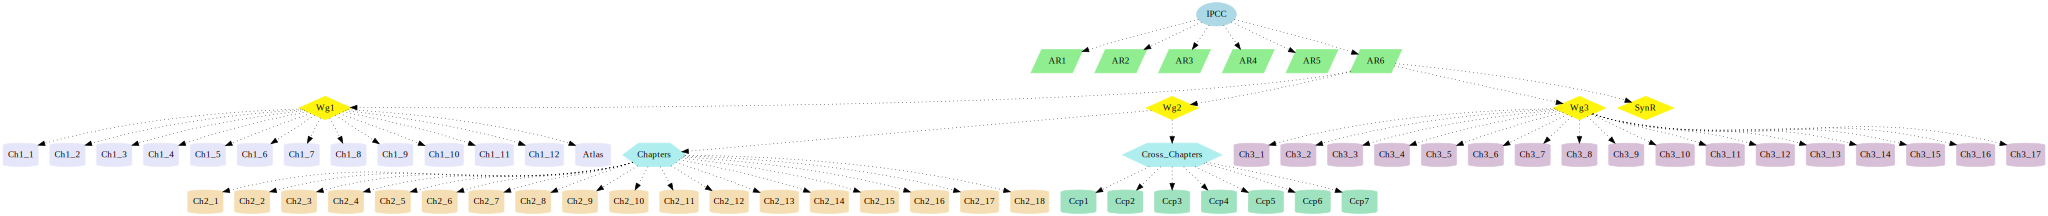

In [ ]:
from IPython.display import SVG, display

# … after graph.render('layered_graph_with_sections')
display(SVG('layered_graph_with_sections.svg'))


In [ ]:
import re
import requests
from bs4 import BeautifulSoup
import graphviz
from IPython.display import SVG, display

# Initialize SVG-directed graph
graph = graphviz.Digraph(format='svg')

# 1) Root node
graph.node('IPCC', shape='oval', style='filled', color='#ADD8E6',
           URL='https://www.ipcc.ch/report')

# 2) AR1–AR6
for i in range(1, 7):
    ar = f'AR{i}'
    graph.node(ar, shape='parallelogram', style='filled', color='#90EE90')
    graph.edge('IPCC', ar, style='dotted')

# 3) Wg1–3 + SynR under AR6
for node in ['Wg1', 'Wg2', 'Wg3', 'SynR']:
    url = (f"https://www.ipcc.ch/report/ar6/{node.lower()}/"
           if node != 'SynR'
           else "https://www.ipcc.ch/report/ar6/syr/")
    graph.node(node, shape='diamond', style='filled', color='#FFF4EO', URL=url)
    graph.edge('AR6', node, style='dotted')

# 4) WG1 chapters + Atlas
for i in range(1, 13):
    n = f'Ch1_{i}'
    url = f"https://www.ipcc.ch/report/ar6/wg1/chapter/chapter-{i}/"
    graph.node(n, shape='cylinder', style='filled', color='#E6E6FA', URL=url)
    graph.edge('Wg1', n, style='dotted')
graph.node('Atlas', shape='cylinder', style='filled', color='#E6E6FA',
           URL="https://www.ipcc.ch/report/ar6/wg1/chapter/atlas/")
graph.edge('Wg1', 'Atlas', style='dotted')

# 5) WG2 subcategories
for sub in ['Chapters', 'Cross_Chapters']:
    graph.node(sub, shape='hexagon', style='filled', color='#AFEEEE')
    graph.edge('Wg2', sub, style='dotted')

# 6) WG2 chapters
for i in range(1, 19):
    n = f'Ch2_{i}'
    url = f"https://www.ipcc.ch/report/ar6/wg2/chapter/chapter-{i}/"
    graph.node(n, shape='cylinder', style='filled', color='#F5DEB3', URL=url)
    graph.edge('Chapters', n, style='dotted')

# 7) WG2 Cross-Chapters + regex-driven section scrape
def fetch_ccp_sections(ccp_id: str):
    """
    Look for headings like 'CCP1.1 Title…' in h2–h6 tags.
    Build anchors by lowercasing and replacing '.'→'-' on the 'CCP1.1' part.
    """
    base = f"https://www.ipcc.ch/report/ar6/wg2/chapter/{ccp_id.lower()}/"
    resp = requests.get(base)
    soup = BeautifulSoup(resp.text, 'html.parser')

    # match 'CCP1.1', 'CCP1.2', etc.
    chapter_num = ccp_id[-1]
    pat = re.compile(rf'^CCP{chapter_num}\.\d+')
    sections = []
    for tag in soup.find_all(re.compile('^h[2-6]$')):
        text = tag.get_text(strip=True)
        if pat.match(text):
            # split off the number from the rest of the title
            num, _, rest = text.partition(' ')
            anchor = num.lower().replace('.', '-')
            title  = rest.strip() or num
            sections.append((title, anchor))

    # Debug
    print(f"⤷ CCP {ccp_id}: found {len(sections)} headings via regex.")
    if sections:
        print("   first examples:", sections[:2])
    return base, sections

for i in range(1, 8):
    node = f'Ccp{i}'
    url_base, sections = fetch_ccp_sections(node)

    # parent CCP node
    graph.node(node, shape='cylinder', style='filled', color='#9FE2BF', URL=url_base)
    graph.edge('Cross_Chapters', node, style='dotted')

    # children = each section heading
    for title, anchor in sections:
        child = f"{node}_{anchor}"
        graph.node(child,
                   label=title,
                   shape='note',
                   style='filled',
                   color='#F0FFF0',
                   URL=f"{url_base}#{anchor}")
        graph.edge(node, child, style='dotted')

# 8) WG3 chapters
for i in range(1, 18):
    n = f'Ch3_{i}'
    url = f"https://www.ipcc.ch/report/ar6/wg3/chapter/chapter-{i}/"
    graph.node(n, shape='cylinder', style='filled', color='#D8BFD8', URL=url)
    graph.edge('Wg3', n, style='dotted')

# 9) Render & inline-display
graph.render('layered_ccp_regex_sections', view=False)
display(SVG('layered_ccp_regex_sections.svg'))


⤷ CCP Ccp1: found 17 headings via regex.
   first examples: [('Global Perspective', 'ccp1-2-1'), ('Observed Impacts', 'ccp1-2-1-1')]
⤷ CCP Ccp2: found 15 headings via regex.
   first examples: [('Introduction and Context', 'ccp2-1-1'), ('Urbanisation in Coastal Systems: Coastal City and Settlement Archetypes', 'ccp2-1-2')]
⤷ CCP Ccp3: found 23 headings via regex.
   first examples: [('Concepts, Definitions and Scope', 'ccp3-1-1'), ('Key Measurement Challenges and Observed Dryland Dynamics', 'ccp3-1-2')]
⤷ CCP Ccp4: found 20 headings via regex.
   first examples: [('The Mediterranean Sea, Land and People', 'ccp4-1-1'), ('Main Findings from Previous Assessments', 'ccp4-1-2')]
⤷ CCP Ccp5: found 20 headings via regex.
   first examples: [('Ecosystems and Ecosystem Services', 'ccp5-2-1'), ('Water and Energy', 'ccp5-2-2')]
⤷ CCP Ccp6: found 24 headings via regex.
   first examples: [('Marine and Coastal Ecosystems', 'ccp6-2-1'), ('Warming and sea ice retreat cause shifts in distribution rang

In [ ]:
# Colab / apt
!apt-get update -y && apt-get install -y graphviz
# Python packages
!pip install graphviz


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✔️ Found: ['CCP1', 'CCP2', 'CCP3', 'CCP4', 'CCP5', 'CCP6', 'CCP7']


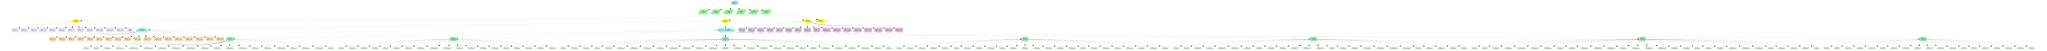

In [ ]:
# Mount Google Drive (if not already)
from google.colab import drive
drive.mount('/content/drive')

# Find CCP files in Drive
import os, re, html
from bs4 import BeautifulSoup
import graphviz
from IPython.display import SVG, display

# Search Drive for CCP HTMLs
ccp_htmls = []
ccp_pattern = re.compile(r'Cross[-\s]?Chapter\s+Paper\s+(\d)', re.I)

for root, _, files in os.walk('/content/drive/MyDrive'):
    for fname in files:
        if fname.lower().endswith('.html') and ccp_pattern.search(fname):
            ccp_htmls.append((ccp_pattern.search(fname).group(1), os.path.join(root, fname)))

print("✔️ Found:", [f"CCP{n}" for n, _ in ccp_htmls])

# Init graph
g = graphviz.Digraph(format='svg')
g.attr('node', fontname='Arial')

g.node('IPCC', shape='oval', style='filled', color='#ADD8E6', URL='https://www.ipcc.ch/report')
for i in range(1, 7):
    g.node(f'AR{i}', shape='parallelogram', style='filled', color='#90EE90',
           URL=f'https://www.ipcc.ch/report/ar{i}/')
    g.edge('IPCC', f'AR{i}', style='dotted')

# Working Groups
for wg in ['Wg1','Wg2','Wg3','SynR']:
    url = f'https://www.ipcc.ch/report/ar6/{wg.lower()}/' if wg != 'SynR' else 'https://www.ipcc.ch/report/ar6/syr/'
    g.node(wg, shape='diamond', style='filled', color='#FFF4EO', URL=url)
    g.edge('AR6', wg, style='dotted')

# WG1 chapters
for i in range(1,13):
    ch = f'Ch1_{i}'
    g.node(ch, shape='cylinder', style='filled', color='#E6E6FA',
           URL=f"https://www.ipcc.ch/report/ar6/wg1/chapter/chapter-{i}/")
    g.edge('Wg1', ch, style='dotted')
g.node('Atlas', shape='cylinder', style='filled', color='#E6E6FA',
       URL="https://www.ipcc.ch/report/ar6/wg1/chapter/atlas/")
g.edge('Wg1', 'Atlas', style='dotted')

# WG2
for sub in ['Chapters', 'Cross_Chapters']:
    g.node(sub, shape='hexagon', style='filled', color='#AFEEEE')
    g.edge('Wg2', sub, style='dotted')
for i in range(1,19):
    ch = f'Ch2_{i}'
    g.node(ch, shape='cylinder', style='filled', color='#F5DEB3',
           URL=f"https://www.ipcc.ch/report/ar6/wg2/chapter/chapter-{i}/")
    g.edge('Chapters', ch, style='dotted')

# Process CCP HTML files
for num, path in ccp_htmls:
    ccp_node = f'Ccp{num}'
    base_url = f"https://www.ipcc.ch/report/ar6/wg2/chapter/ccp{num}/"

    g.node(ccp_node, shape='cylinder', style='filled', color='#9FE2BF', URL=base_url)
    g.edge('Cross_Chapters', ccp_node, style='dotted')

    with open(path, 'r', encoding='utf-8') as f:
        soup = BeautifulSoup(f, 'html.parser')

    for tag in soup.find_all(id=re.compile(fr'^CCP{num}\.\d+')):
        anchor = tag['id']
        label = html.escape(anchor)
        node_id = f"{ccp_node}_{anchor.replace('.', '_')}"
        full_url = f"{base_url}#{anchor}"

        g.node(node_id, label=label, shape='note', style='filled', color='#F0FFF0', URL=full_url)
        g.edge(ccp_node, node_id, style='dotted')

# WG3 chapters
for i in range(1,18):
    ch = f'Ch3_{i}'
    g.node(ch, shape='cylinder', style='filled', color='#D8BFD8',
           URL=f"https://www.ipcc.ch/report/ar6/wg3/chapter/chapter-{i}/")
    g.edge('Wg3', ch, style='dotted')

# Render and show
svg_path = g.render('/content/ipcc_ccp_live_links', cleanup=True)
display(SVG(svg_path))


Mounted at /content/drive
✔️ Found: ['CCP1', 'CCP2', 'CCP3', 'CCP4', 'CCP5', 'CCP6', 'CCP7']


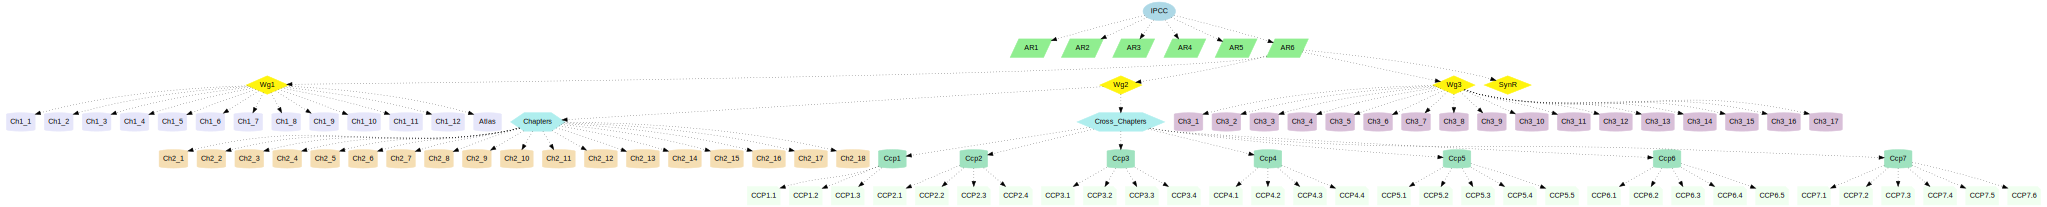

✅ SVG created: /content/ipcc_ccp_top_sections.svg


In [1]:
# ───── Install required tools (first time only) ─────
!apt-get -qq install -y graphviz
!pip install -qq graphviz beautifulsoup4

# ───── Mount Google Drive ─────
from google.colab import drive
drive.mount('/content/drive')

# ───── Locate CCP files in Drive ─────
import os, re, html
from bs4 import BeautifulSoup
import graphviz
from IPython.display import SVG, display

ccp_files = []
fname_re = re.compile(r'Cross[-\s]?Chapter\s+Paper\s+(\d)', re.I)

for root, _, files in os.walk('/content/drive/MyDrive'):
    for fname in files:
        if fname.lower().endswith('.html') and fname_re.search(fname):
            full_path = os.path.join(root, fname)
            num = fname_re.search(fname).group(1)
            ccp_files.append((num, full_path))

if not ccp_files:
    raise FileNotFoundError("No CCP HTML files found in Drive.")

print("✔️ Found:", [f"CCP{n}" for n, _ in ccp_files])

# ───── Build the Graphviz graph ─────
g = graphviz.Digraph(format='svg')
g.attr('node', fontname='Arial')

# Root IPCC
g.node('IPCC', shape='oval', style='filled', color='#ADD8E6', URL='https://www.ipcc.ch/report')
for i in range(1, 7):
    g.node(f'AR{i}', shape='parallelogram', style='filled', color='#90EE90',
           URL=f'https://www.ipcc.ch/report/ar{i}/')
    g.edge('IPCC', f'AR{i}', style='dotted')

# WGs
for wg in ['Wg1','Wg2','Wg3','SynR']:
    url = f"https://www.ipcc.ch/report/ar6/{wg.lower()}/" if wg != 'SynR' else "https://www.ipcc.ch/report/ar6/syr/"
    g.node(wg, shape='diamond', style='filled', color='#FFF4EO', URL=url)
    g.edge('AR6', wg, style='dotted')

# WG1 Chapters + Atlas
for i in range(1, 13):
    ch = f'Ch1_{i}'
    g.node(ch, shape='cylinder', style='filled', color='#E6E6FA',
           URL=f"https://www.ipcc.ch/report/ar6/wg1/chapter/chapter-{i}/")
    g.edge('Wg1', ch, style='dotted')
g.node('Atlas', shape='cylinder', style='filled', color='#E6E6FA',
       URL="https://www.ipcc.ch/report/ar6/wg1/chapter/atlas/")
g.edge('Wg1', 'Atlas', style='dotted')

# WG2 Subcategories
for sub in ['Chapters','Cross_Chapters']:
    g.node(sub, shape='hexagon', style='filled', color='#AFEEEE')
    g.edge('Wg2', sub, style='dotted')
for i in range(1,19):
    ch = f'Ch2_{i}'
    g.node(ch, shape='cylinder', style='filled', color='#F5DEB3',
           URL=f"https://www.ipcc.ch/report/ar6/wg2/chapter/chapter-{i}/")
    g.edge('Chapters', ch, style='dotted')

# ───── Process CCPs with top-level anchors only ─────
for num, path in ccp_files:
    ccp_node = f'Ccp{num}'
    base_url = f"https://www.ipcc.ch/report/ar6/wg2/chapter/ccp{num}/"

    g.node(ccp_node, shape='cylinder', style='filled', color='#9FE2BF', URL=base_url)
    g.edge('Cross_Chapters', ccp_node, style='dotted')

    with open(path, 'r', encoding='utf-8') as f:
        soup = BeautifulSoup(f, 'html.parser')

    # Extract IDs like CCP1.1 (but not CCP1.1.1 or deeper)
    anchors = [tag['id'] for tag in soup.find_all(id=re.compile(fr'^CCP{num}\.\d+$'))]

    for anchor in anchors:
        child_id = f"{ccp_node}_{anchor.replace('.', '_')}"
        label = html.escape(anchor)
        full_url = f"{base_url}#{anchor}"
        g.node(child_id, label=label, shape='note', style='filled', color='#F0FFF0', URL=full_url)
        g.edge(ccp_node, child_id, style='dotted')

# WG3
for i in range(1,18):
    ch = f'Ch3_{i}'
    g.node(ch, shape='cylinder', style='filled', color='#D8BFD8',
           URL=f"https://www.ipcc.ch/report/ar6/wg3/chapter/chapter-{i}/")
    g.edge('Wg3', ch, style='dotted')

# ───── Render and Display ─────
svg_path = g.render('/content/ipcc_ccp_top_sections', cleanup=True)
display(SVG(svg_path))
print(f"✅ SVG created: {svg_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✔️ Found: ['CCP1', 'CCP2', 'CCP3', 'CCP4', 'CCP5', 'CCP6', 'CCP7']


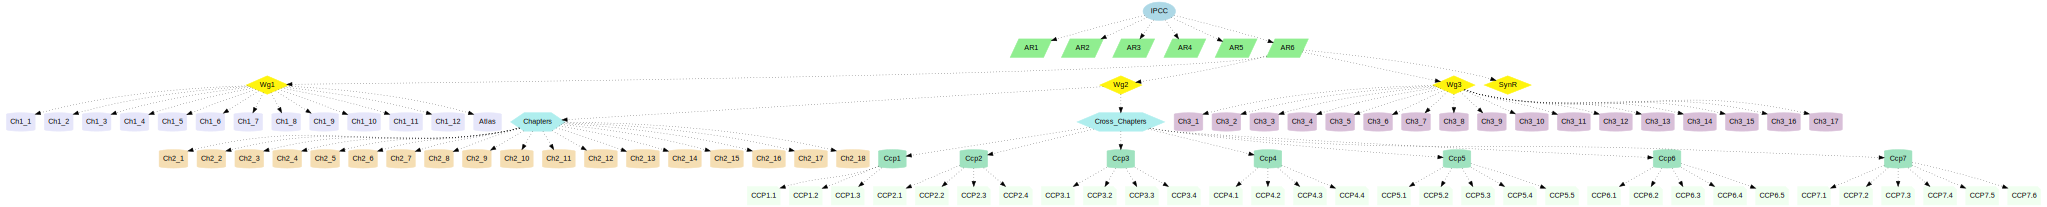

✅ SVG created: /content/ipcc_ccp_top_sections.svg


In [6]:
# ───── Install required tools (first time only) ─────
!apt-get -qq install -y graphviz
!pip install -qq graphviz beautifulsoup4

# ───── Mount Google Drive ─────
from google.colab import drive
drive.mount('/content/drive')

# ───── Imports ─────
import os, re, html
from bs4 import BeautifulSoup, NavigableString
import graphviz
from IPython.display import SVG, display

# ───── Locate CCP files in Drive ─────
ccp_files = []
fname_re = re.compile(r'Cross[-\s]?Chapter\s+Paper\s+(\d)', re.I)
for root, _, files in os.walk('/content/drive/MyDrive'):
    for fname in files:
        m = fname_re.search(fname)
        if fname.lower().endswith('.html') and m:
            ccp_files.append((m.group(1), os.path.join(root, fname)))
if not ccp_files:
    raise FileNotFoundError("No CCP HTML files found in Drive.")
print("✔️ Found:", [f"CCP{n}" for n, _ in ccp_files])

# ───── Build the Graphviz graph ─────
g = graphviz.Digraph(format='svg')
g.attr('node', fontname='Arial')

# Root IPCC
g.node('IPCC', shape='oval', style='filled', color='#ADD8E6', URL='https://www.ipcc.ch/report')
for i in range(1, 7):
    g.node(f'AR{i}', shape='parallelogram', style='filled', color='#90EE90',
           URL=f'https://www.ipcc.ch/report/ar{i}/')
    g.edge('IPCC', f'AR{i}', style='dotted')

# WGs
for wg in ['Wg1','Wg2','Wg3','SynR']:
    url = (f"https://www.ipcc.ch/report/ar6/{wg.lower()}/"
           if wg!='SynR' else "https://www.ipcc.ch/report/ar6/syr/")
    g.node(wg, shape='diamond', style='filled', color='#FFF4EO', URL=url)
    g.edge('AR6', wg, style='dotted')

# WG1 chapters + Atlas
for i in range(1, 13):
    ch = f'Ch1_{i}'
    g.node(ch, shape='cylinder', style='filled', color='#E6E6FA',
           URL=f"https://www.ipcc.ch/report/ar6/wg1/chapter/chapter-{i}/")
    g.edge('Wg1', ch, style='dotted')
g.node('Atlas', shape='cylinder', style='filled', color='#E6E6FA',
       URL="https://www.ipcc.ch/report/ar6/wg1/chapter/atlas/")
g.edge('Wg1', 'Atlas', style='dotted')

# WG2 subcategories + chapters
for sub in ['Chapters','Cross_Chapters']:
    g.node(sub, shape='hexagon', style='filled', color='#AFEEEE')
    g.edge('Wg2', sub, style='dotted')
for i in range(1,19):
    ch = f'Ch2_{i}'
    g.node(ch, shape='cylinder', style='filled', color='#F5DEB3',
           URL=f"https://www.ipcc.ch/report/ar6/wg2/chapter/chapter-{i}/")
    g.edge('Chapters', ch, style='dotted')

# ───── Process CCPs (all subnodes + sanitized tooltips) ─────
def sanitize_tooltip(text, maxlen=200):
    # collapse whitespace/newlines, escape quotes, truncate
    t = " ".join(text.split())
    t = t.replace('"', '\\"')
    if len(t) > maxlen:
        t = t[: maxlen - 3] + "..."
    return t

for num, path in ccp_files:
    parent = f'Ccp{num}'
    base = f"https://www.ipcc.ch/report/ar6/wg2/chapter/ccp{num}/"

    # Parent CCP node
    g.node(parent, shape='cylinder', style='filled', color='#9FE2BF', URL=base)
    g.edge('Cross_Chapters', parent, style='dotted')

    # Parse file
    with open(path, 'r', encoding='utf-8') as f:
        soup = BeautifulSoup(f, 'html.parser')

    # Find every tag whose id is "CCP{num}.\d+"
    id_tags = soup.find_all(id=re.compile(fr'^CCP{num}\.\d+$'))
    for tag in id_tags:
        anchor = tag['id']  # e.g. "CCP1.2"

        # Walk to the next non-empty element sibling for the real heading
        nxt = tag
        title = ""
        while True:
            nxt = nxt.next_sibling
            if nxt is None:
                break
            if isinstance(nxt, NavigableString):
                continue
            txt = nxt.get_text(strip=True)
            if txt:
                title = txt
                break
        if not title:
            title = anchor

        node_id = f"{parent}_{anchor.replace('.', '_')}"
        url     = f"{base}#{anchor}"
        tip     = sanitize_tooltip(title)

        g.node(
            node_id,
            label=html.escape(anchor),
            shape='note',
            style='filled',
            color='#F0FFF0',
            URL=url,
            tooltip=tip
        )
        g.edge(parent, node_id, style='dotted')

# WG3 chapters
for i in range(1,18):
    ch = f'Ch3_{i}'
    g.node(ch, shape='cylinder', style='filled', color='#D8BFD8',
           URL=f"https://www.ipcc.ch/report/ar6/wg3/chapter/chapter-{i}/")
    g.edge('Wg3', ch, style='dotted')

# ───── Render & Display ─────
svg_path = g.render('/content/ipcc_ccp_top_sections', cleanup=True)
display(SVG(svg_path))
print(f"✅ SVG created: {svg_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✔️ Found: ['CCP1', 'CCP2', 'CCP3', 'CCP4', 'CCP5', 'CCP6', 'CCP7']


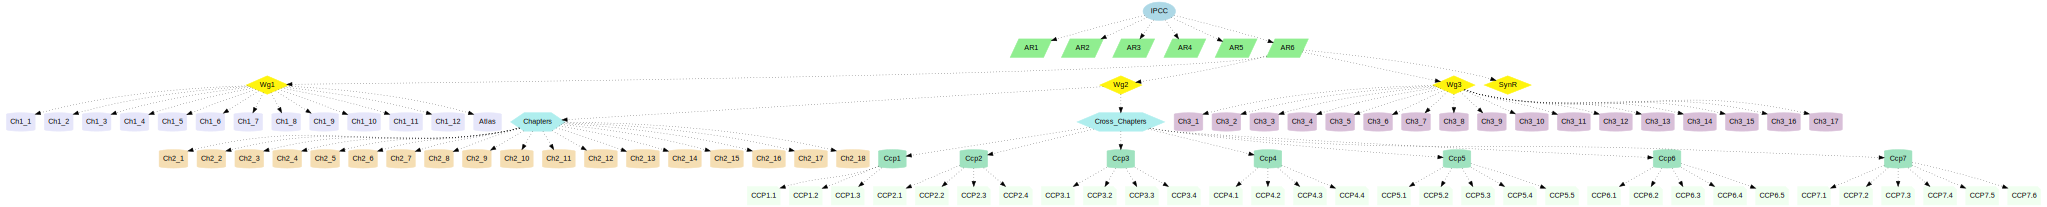

✅ SVG created: /content/ipcc_ccp_top_sections.svg


In [9]:
# ───── Install required tools (first time only) ─────
!apt-get -qq install -y graphviz
!pip install -qq graphviz beautifulsoup4

# ───── Mount Google Drive ─────
from google.colab import drive
drive.mount('/content/drive')

# ───── Imports ─────
import os, re, html
from bs4 import BeautifulSoup, NavigableString
import graphviz
from IPython.display import SVG, display

# ───── Locate CCP HTML files in Drive ─────
ccp_files = []
fname_re = re.compile(r'Cross[-\s]?Chapter\s+Paper\s+(\d)', re.I)
for root, _, files in os.walk('/content/drive/MyDrive'):
    for fname in files:
        m = fname_re.search(fname)
        if fname.lower().endswith('.html') and m:
            ccp_files.append((m.group(1), os.path.join(root, fname)))
if not ccp_files:
    raise FileNotFoundError("No CCP HTML files found in Drive.")
print("✔️ Found:", [f"CCP{n}" for n, _ in ccp_files])

# ───── Build the Graphviz graph ─────
g = graphviz.Digraph(format='svg')
g.attr('node', fontname='Arial')

# Root IPCC + AR1–AR6
g.node('IPCC', shape='oval', style='filled', color='#ADD8E6', URL='https://www.ipcc.ch/report')
for i in range(1, 7):
    g.node(f'AR{i}', shape='parallelogram', style='filled', color='#90EE90',
           URL=f'https://www.ipcc.ch/report/ar{i}/')
    g.edge('IPCC', f'AR{i}', style='dotted')

# Working Groups
for wg in ['Wg1','Wg2','Wg3','SynR']:
    url = (f"https://www.ipcc.ch/report/ar6/{wg.lower()}/"
           if wg!='SynR' else "https://www.ipcc.ch/report/ar6/syr/")
    g.node(wg, shape='diamond', style='filled', color='#FFF4EO', URL=url)
    g.edge('AR6', wg, style='dotted')

# WG1 Chapters + Atlas
for i in range(1, 13):
    ch = f'Ch1_{i}'
    g.node(ch, shape='cylinder', style='filled', color='#E6E6FA',
           URL=f"https://www.ipcc.ch/report/ar6/wg1/chapter/chapter-{i}/")
    g.edge('Wg1', ch, style='dotted')
g.node('Atlas', shape='cylinder', style='filled', color='#E6E6FA',
       URL="https://www.ipcc.ch/report/ar6/wg1/chapter/atlas/")
g.edge('Wg1', 'Atlas', style='dotted')

# WG2 Subcategories + Chapters
for sub in ['Chapters','Cross_Chapters']:
    g.node(sub, shape='hexagon', style='filled', color='#AFEEEE')
    g.edge('Wg2', sub, style='dotted')
for i in range(1,19):
    ch = f'Ch2_{i}'
    g.node(ch, shape='cylinder', style='filled', color='#F5DEB3',
           URL=f"https://www.ipcc.ch/report/ar6/wg2/chapter/chapter-{i}/")
    g.edge('Chapters', ch, style='dotted')

# ───── Helper to extract just the CCP heading ─────
def extract_ccp_heading(tag, num):
    headers = ['h1','h2','h3']
    # 1) look inside the tag for a header
    for h in headers:
        htag = tag.find(h)
        if htag and htag.get_text(strip=True):
            text = htag.get_text(strip=True)
            return re.sub(rf'^CCP{num}\.\d+\s*', '', text, count=1)
    # 2) fallback to next-sibling header
    sib = tag.next_sibling
    while sib:
        if not isinstance(sib, NavigableString) and sib.name in headers:
            txt = sib.get_text(strip=True)
            if txt:
                return re.sub(rf'^CCP{num}\.\d+\s*', '', txt, count=1)
        sib = sib.next_sibling
    # 3) last resort: just the anchor
    return tag['id']

def sanitize(heading, maxlen=200):
    # collapse whitespace/newlines
    s = " ".join(heading.split())
    # remove unwanted UI text
    s = s.replace('Expand section', '').replace('Expand section', '')
    # escape quotes
    s = s.replace('"', '\\"')
    # truncate
    return (s[:maxlen-3] + '...') if len(s) > maxlen else s

# ───── Process each CCP ─────
for num, path in ccp_files:
    parent = f'Ccp{num}'
    base   = f"https://www.ipcc.ch/report/ar6/wg2/chapter/ccp{num}/"

    # create parent node
    g.node(parent, shape='cylinder', style='filled', color='#9FE2BF', URL=base)
    g.edge('Cross_Chapters', parent, style='dotted')

    # parse HTML
    with open(path, 'r', encoding='utf-8') as f:
        soup = BeautifulSoup(f, 'html.parser')

    # add each top-level CCPx.y subnode
    for tag in soup.find_all(id=re.compile(fr'^CCP{num}\.\d+$')):
        anchor  = tag['id']                       # e.g. "CCP1.2"
        heading = extract_ccp_heading(tag, num)   # e.g. "Key Findings"
        tip     = sanitize(heading)
        nid     = f"{parent}_{anchor.replace('.', '_')}"
        url     = f"{base}#{anchor}"

        g.node(
            nid,
            label=html.escape(anchor),
            shape='note',
            style='filled',
            color='#F0FFF0',
            URL=url,
            tooltip=tip
        )
        g.edge(parent, nid, style='dotted')

# WG3 Chapters
for i in range(1,18):
    ch = f'Ch3_{i}'
    g.node(ch, shape='cylinder', style='filled', color='#D8BFD8',
           URL=f"https://www.ipcc.ch/report/ar6/wg3/chapter/chapter-{i}/")
    g.edge('Wg3', ch, style='dotted')

# ───── Render & display ─────
svg_path = g.render('/content/ipcc_ccp_top_sections', cleanup=True)
display(SVG(svg_path))
print("✅ SVG created:", svg_path)
